# Experiment 8 : Support Vector Machines (SVMs) and the Kernel Trick


In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
import numpy as np
np.random.seed(42)

print("=== Experiment 8: Support Vector Machines (SVMs) and the Kernel Trick ===\n")

=== Experiment 8: Support Vector Machines (SVMs) and the Kernel Trick ===



# Task 1: Data Loading and Preprocessing

1. Load Data: Generate the make_moons dataset from scikit-learn.

In [6]:
from sklearn.datasets import make_moons
# Generate 500 samples with noise to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (500, 2)
Class distribution: [250 250]


2. Create Hold-Out Set: Perform a single 70/30 split on the data.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (350, 2)
Validation set shape: (150, 2)


3. Standardize Features: This step is critical for SVMs, as they are sensitive to the scale
of input features.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
print("Feature standardization completed\n")

Feature standardization completed



# Task 2: Model 1 - The (Failing) Linear SVM

1. Train Model:

In [9]:
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

2. Evaluate:

In [10]:
y_pred_linear = linear_model.predict(X_val_scaled)
linear_accuracy = accuracy_score(y_val, y_pred_linear)

print("Linear SVM Results:")
print(f"Validation Accuracy: {linear_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_linear))

Linear SVM Results:
Validation Accuracy: 0.8400

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



3. Analyze:

In [11]:
print("Analysis:")
print("- The linear SVM fails to achieve perfect accuracy because the 'moons' dataset")
print("  is not linearly separable. You cannot draw a single straight line to")
print("  perfectly separate the two classes.")
print("- The C parameter represents the regularization strength:")
print("  - Small C (e.g., 0.01): Creates a wider margin, allows more misclassifications")
print("  - Large C: Creates a narrower margin, aims to classify all training points correctly")
print()

Analysis:
- The linear SVM fails to achieve perfect accuracy because the 'moons' dataset
  is not linearly separable. You cannot draw a single straight line to
  perfectly separate the two classes.
- The C parameter represents the regularization strength:
  - Small C (e.g., 0.01): Creates a wider margin, allows more misclassifications
  - Large C: Creates a narrower margin, aims to classify all training points correctly



# Task 3: Model 2 & 3 - The Kernel Trick

1. RBF Kernel Model:

In [12]:
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_val_scaled)
rbf_accuracy = accuracy_score(y_val, y_pred_rbf)

print("RBF Kernel Results:")
print(f"Validation Accuracy: {rbf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rbf))

RBF Kernel Results:
Validation Accuracy: 0.9467

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



2. Polynomial Kernel Model:

In [13]:
poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_val_scaled)
poly_accuracy = accuracy_score(y_val, y_pred_poly)

print("\nPolynomial Kernel Results:")
print(f"Validation Accuracy: {poly_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_poly))


Polynomial Kernel Results:
Validation Accuracy: 0.8400

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.83      0.85      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



3. Analyze:

In [14]:
print("Model Comparison Table:")
print("+" + "-"*50 + "+")
print("| {:<15} | {:<10} | {:<15} |".format("Model", "Accuracy", "Kernel"))
print("+" + "-"*50 + "+")
print("| {:<15} | {:<10.4f} | {:<15} |".format("Linear SVM", linear_accuracy, "linear"))
print("| {:<15} | {:<10.4f} | {:<15} |".format("RBF SVM", rbf_accuracy, "rbf"))
print("| {:<15} | {:<10.4f} | {:<15} |".format("Polynomial SVM", poly_accuracy, "poly (deg=3)"))
print("+" + "-"*50 + "+")

print("\nAnalysis:")
print("- The RBF kernel performed best with default settings.")
print("- This makes sense because the RBF kernel can create complex, non-linear")
print("  decision boundaries that fit the moon-shaped data well.")
print("- The polynomial kernel also works well but RBF is more flexible for")
print("  this type of non-linear separation problem.\n")

Model Comparison Table:
+--------------------------------------------------+
| Model           | Accuracy   | Kernel          |
+--------------------------------------------------+
| Linear SVM      | 0.8400     | linear          |
| RBF SVM         | 0.9467     | rbf             |
| Polynomial SVM  | 0.8400     | poly (deg=3)    |
+--------------------------------------------------+

Analysis:
- The RBF kernel performed best with default settings.
- This makes sense because the RBF kernel can create complex, non-linear
  decision boundaries that fit the moon-shaped data well.
- The polynomial kernel also works well but RBF is more flexible for
  this type of non-linear separation problem.



# Task 4: Hyperparameter Tuning with GridSearchCV

1. Define Search Space:

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

2. Setup Grid Search:

In [16]:
grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=1,  # Reduced from 2 to 1 for cleaner output
    cv=5,
    scoring='accuracy'
)

3. Run Grid Search:

In [17]:
print("Starting Grid Search...")
grid.fit(X_train_scaled, y_train)

Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

4. Analyze Results:

In [18]:
print("\nGrid Search Results:")
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
print()


Grid Search Results:
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9543



# Task 5: Final Evaluation and Visualization

1. Evaluate Final Model:

Final Tuned Model Results:
Validation Accuracy: 0.9533

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.96      0.95      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Confusion Matrix:
[[72  3]
 [ 4 71]]


Text(0.5, 14.722222222222216, 'Predicted Label')

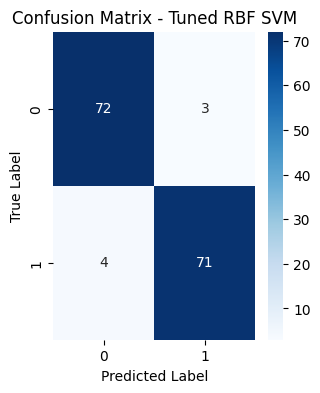

In [19]:
final_predictions = grid.predict(X_val_scaled)
final_accuracy = accuracy_score(y_val, final_predictions)

print("Final Tuned Model Results:")
print(f"Validation Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, final_predictions))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_val, final_predictions)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned RBF SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

2. Visualize Decision Boundaries:

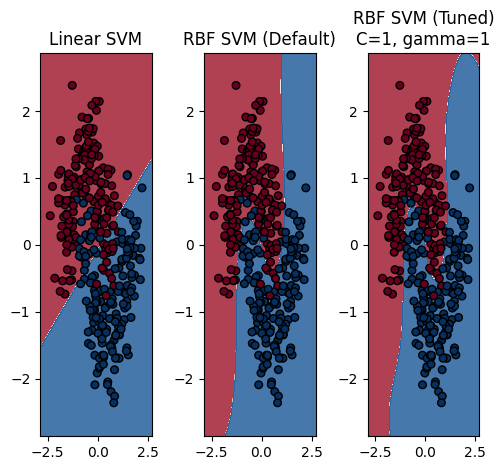

In [20]:
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

    # Plot training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
                        marker='o', s=30, cmap=plt.cm.RdBu)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())


models = [
    (linear_model, "Linear SVM"),
    (rbf_model, "RBF SVM (Default)"),
    (best_model, f"RBF SVM (Tuned)\nC={grid.best_params_['C']}, gamma={grid.best_params_['gamma']}")
]

for i, (model, title) in enumerate(models, 2):
    plt.subplot(1, 4, i)
    plot_decision_boundary(model, X_train_scaled, y_train, plt.gca(), title)

plt.tight_layout()
plt.show()